# Booking.com Data Job Analysis


### Introduction

>**We rely on AI to analyse your CV and enrich it with market data to get a well rounded skill set overview. Consequently, your skills will be matched with the best available career opportunity.**

### Project Objective


### Methodology
- Reading in raw data from web scraper
- Cleaning up data / string manipulation
- Exploratory Analysis to understand data
- Delving into specifics to answer key questions

* In order to create a concise overview of the relevant data, I will opt for creating topic specific dataframes


# Imports

In [27]:
#Imports
import numpy as np
import pandas as pd

#Settings for string legibility
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', -1)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#String manipulations
import re, string

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
plt.rcParams['figure.figsize'] = [20,16]
plt.rcParams['figure.dpi'] = 300
%config InlineBackend.figure_format = 'svg'
sns.set_style("whitegrid")

#Wordcloud
from wordcloud import WordCloud
from nltk.corpus import stopwords

#Quality of life
import warnings
warnings.filterwarnings('ignore')

# Data

The raw data received from the web scraper requires a bit of tidying up. Apart from the Job Title the dataframe consists mainly of long strings that needs to be made legible within the scope of this project.

In [28]:
df = pd.read_csv('Booking_Jobs.csv')

In [29]:
print('Dataframe shape: ', df.shape)
df.head()

Dataframe shape:  (108, 2)


Job Title  \
0  Data Engineer                                                        
1  Manager Data Science Insights - Content Agency                       
2  Senior Data Engineering Manager - Data & Machine Learning Platform   
3  Senior Data Engineer - Data & Machine Learning Platform              
4  Data Analyst Trip Foundations                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        108 non-null    object
 1   Job Description  108 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB


In [31]:
job_listings = df['Job Title'].count()
job_listings

108

### String Manipulation

We'll start by adding all Data job descriptions together to find the most commonly used words on the Booking.com career site. Doing this will allow us to gain insight into what words the company uses to describe itself, their values, and what they seek in future employees. To get a more accurate reprentation of which key words matter most we'll filter out common stopwords. Though there are many libraries that provide lists of stopwords on various languages, we'll need to add a few more words that are specific to this platform.

In [32]:
stopwords = sorted(stopwords.words('english')) #Using the Natural Language Toolkit (NLTK) library
stopwords_booking = ['booking','com', 'booking.com', 'bookingcom', 'part', 'right', 'make', 'work', 'working', #Adding platform specific words
                     'need', 'e','g', 'eg', '&','within', 'well', '-', '.', 'including', 'high', 'role', 'relevant', 
                     'strong', 'key','one', 'year', 'years', 'looking', 'everyone', 'easier', 'sexual', 'we\'re', 'etc',
                     'orientation','best', 'company', 'B', 'application', 'equal', 'opportunity', 'national', 'world'
                     'origin', 'across', 'able', 'genetic', 'disability', 'new', 'gender', 'identity', 'level']
stopwords.extend(stopwords_booking) #Combining both into a stopwords list

In [33]:
all_descriptions = ''.join(description for description in df['Job Description']) #Joining together all descriptions
all_descriptions = all_descriptions.replace('teams','team') #Combining similar words to create fair comparison
all_descriptions = all_descriptions.replace('world.','world') #Combining similar words to create fair comparison
all_descriptions = all_descriptions.replace('products','product') #Combining similar words to create fair comparison
all_descriptions = all_descriptions.translate(str.maketrans('', '', string.punctuation)) #Removing punctuation
all_descriptions = all_descriptions.lower() #Lowering all characters to allow comparison

print ("There are {} words in the combined data-related job descriptions.".format(len(all_descriptions))) #Printing results

There are 536768 words in the combined data-related job descriptions.


Now that we have a combined list of all Job Descriptions, we can move on with offsetting it against our Stopwords list and creating a cleaned dataframe.

The process will look as follows:
>1. Split the Job Descriptions into words
>2. Create a dictionary **(word_count)** of counted words
>3. Sort **word_count** by value to create **words_popular**
>4. Drop all words from **words_popular** that are also in our **stopwords** list to create **words_popular_nonstop**
>5. Finally, we create our dataframe **words_all_jobs**


In [8]:
word_count = dict(Counter(all_descriptions.split())) #(1/2) Creating a dictionary of all words in split description
words_popular = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1], reverse=True)} #(3) Sorting dictionary by most popular words
words_nonstop = [w for w in words_popular if w not in stopwords] #(4) Drop all words that appear in both words_popular AND stopwords
words_popular_nonstop = {k: words_popular[k] for k in words_nonstop if k in words_popular}
words_all_jobs = pd.DataFrame.from_dict(words_popular_nonstop, orient='index',columns=['Count']).reset_index() #(5) Create our cleaned dataframe
words_all_jobs.head(10)

index  Count
0  data        742  
1  team        692  
2  experience  657  
3  product     576  
4  business    522  
5  learning    267  
6  world       260  
7  machine     260  
8  skills      227  
9  management  216

# Exploratory Analysis

One way to make this intuitively insightful is to use a wordcloud, which displays the most common words in a visual manner. The size of each word corresponds to the frequency of its use.

In [34]:
wordcloud = WordCloud(min_font_size=8, max_font_size=100, max_words=500, width=800, height=400,prefer_horizontal=1, background_color='white').generate_from_frequencies(words_popular_nonstop) #Generate wordcloud class from dictionary

In [35]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Wordcloud - what did we learn?

Having included ALL data-related jobs, we can only spot general trends - our findings match that match of a(ny) data-driven company.

A few words pop out immediately (Data, Experience, Business, Team, Product), so it's worth paying closer attention to the 'secondary' words as well.

- **(Machine) Learning**: A general machine learning trend?
    - Treating these as seperate words loses out on possible overlap and will require further research
    - Correlation? Machine is often found in combination with Intelligence, Learning often turns up before Models and Code.
    - Overall, 'Machine' hints at strong ML-focus since it's a word rarely used outside of this context (in job positions).
    - Representation - How many jobs are ML-related and how much does this skew our vision of general Booking.com jobs descriptions?


- **World**: as one of the world’s leading digital travel companies this emphasizes their global presence and state of mind.

- **Empowerment**: we see a high frequency of words aligning with Booking.com values like: Vision, Development, Identify, Impact, and Ownership.

### Bar Chart

Wordclouds are great for getting a sense of what's important, but ranking the top 20 most relevant words becomes more difficult. That's why we use a bar chart to accurately rank and communicate our findings.

Text(0.5, 1.0, '25 Most Frequenctly Used Words in Booking.com Data-related Job Listings')

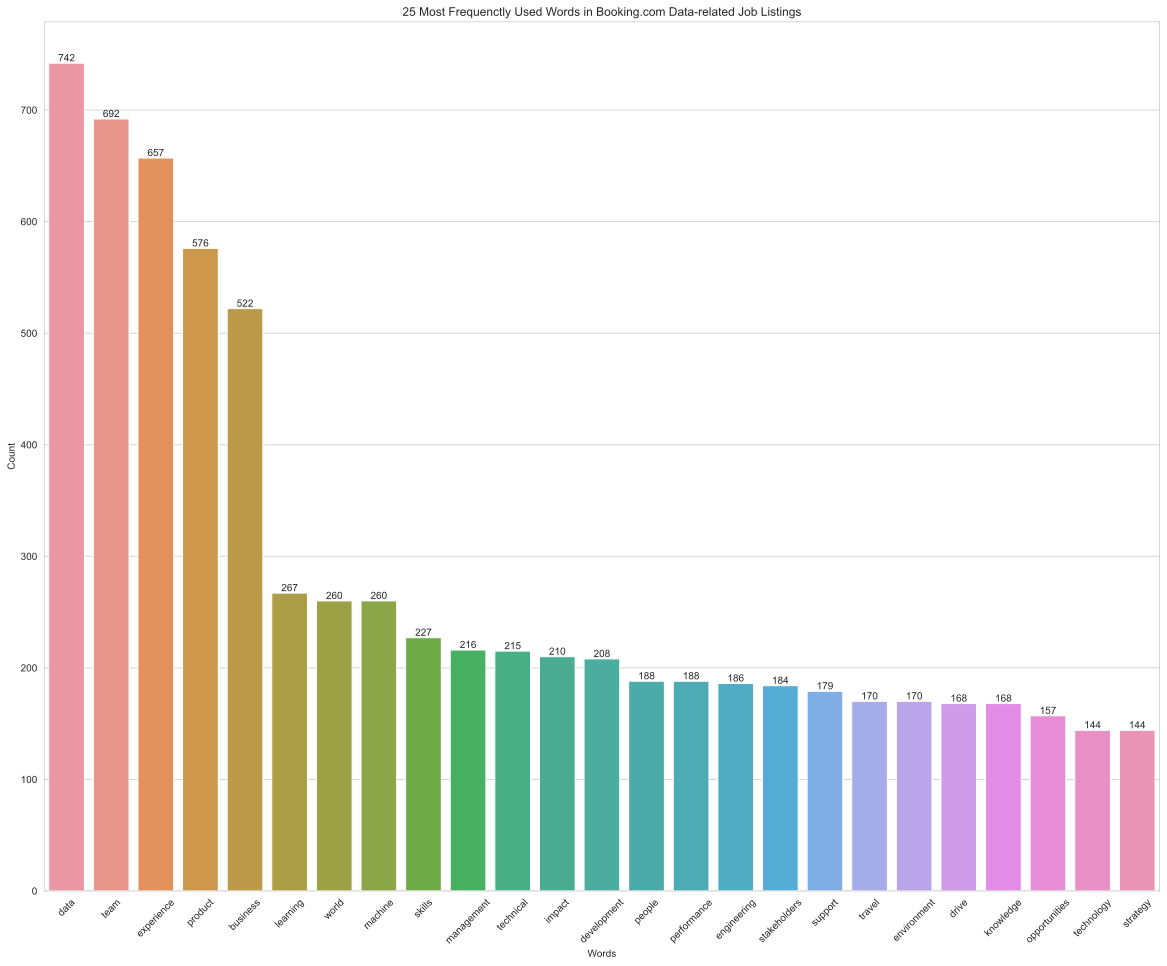

In [36]:
ax = sns.barplot(data=words_all_jobs[:25],x='index',y='Count')
ax.bar_label(ax.containers[0])
plt.xticks(rotation= 45)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('25 Most Frequenctly Used Words in Booking.com Data-related Job Listings')

Q: How big a percentage of all words used is a Top 5 Word?

In [37]:
words_all_jobs['Count'][5:].sum()/words_all_jobs['Count'][:5].sum()

13.331765443712763

A: Roughly 13%

Let's calculate the ratio of each of these words per job listing.

In [38]:
words_all_jobs['Ratio_Listings']= words_all_jobs['Count']/job_listings #Creating new column for ratios
words_all_jobs

index  Count  Ratio_Listings
0     data        742    6.870370      
1     team        692    6.407407      
2     experience  657    6.083333      
3     product     576    5.333333      
4     business    522    4.833333      
...        ...    ...         ...      
4140  attractive  1      0.009259      
4141  parter      1      0.009259      
4142  expansion   1      0.009259      
4143  cold        1      0.009259      
4144  calling     1      0.009259      

[4145 rows x 3 columns]

Text(0.5, 1.0, 'Frequency of Word Use per Job Listing - A Top 25')

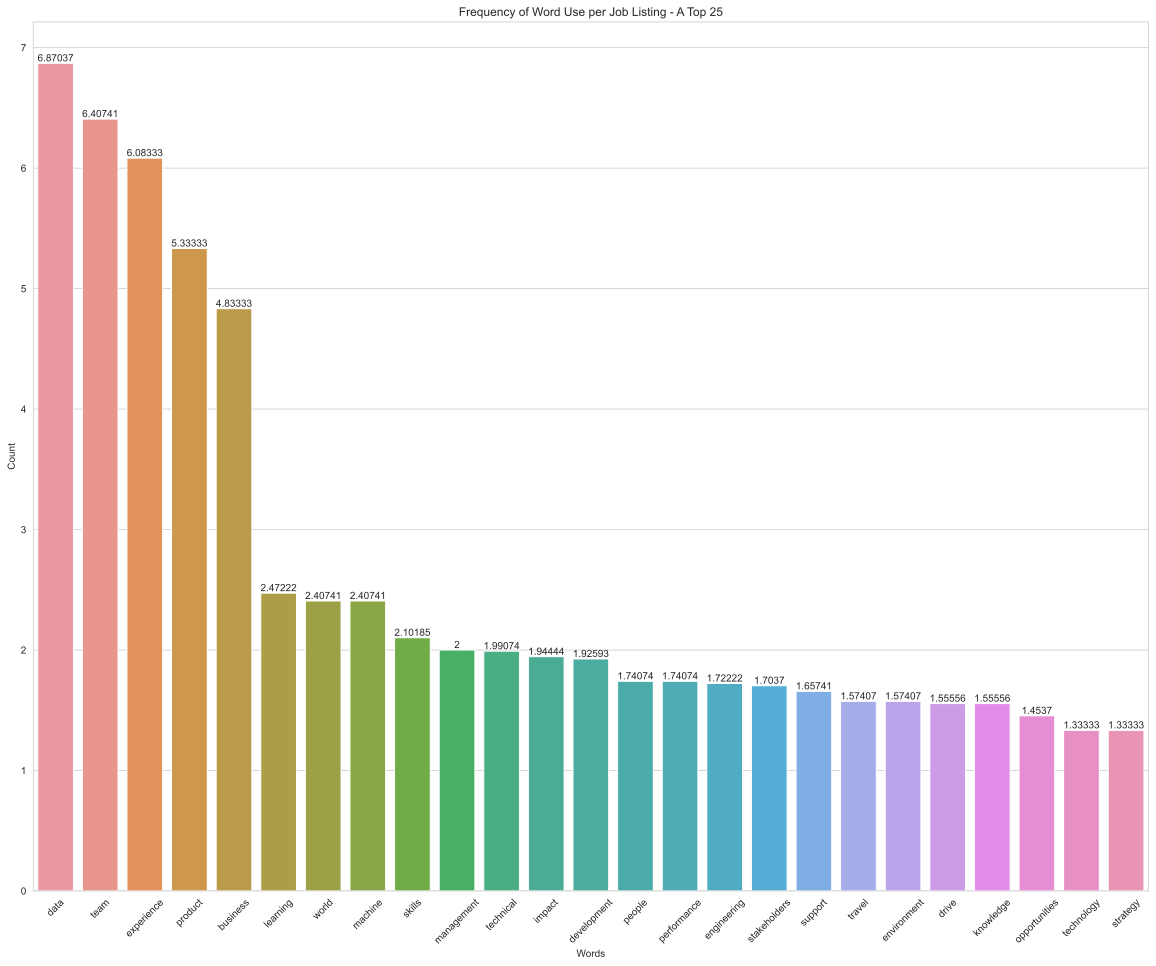

In [39]:
ax = sns.barplot(data=words_all_jobs[:25],x='index',y='Ratio_Listings')
ax.bar_label(ax.containers[0])
plt.xticks(rotation= 45)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Frequency of Word Use per Job Listing - A Top 25')

In [40]:
words_all_jobs['Ratio_Listings'][0]/words_all_jobs['Ratio_Listings'][5] #Ratio DATA to LEARNING

2.779026217228464

In [41]:
words_all_jobs['Ratio_Listings'][4]/words_all_jobs['Ratio_Listings'][5] #Ratio BUSINESS to LEARNING

1.9550561797752808

### Bar chart - what did we learn?

- Top 5 hegemony:
    - The differences between the 5 most used words and the rest is substatial
    - **13%** of all words used is 'Data', 'Team', 'Experience', 'Product' or 'Business'
    - The number 1 word 'Data' is **2.8 times** more frequenty used than the 6th place 'Learning'
    - 'Business' is more almost **2 times more** likely to get used than any word outside the top 5
    - 'Data', 'Team' and 'Experience' are all used **over 6 times** per job listing

## Job Titles

Now let's focus on the Job Titles to further out understanding of roles within Booking.com.

In [42]:
df['Job Title'].nunique()==df['Job Title'].count()

True

The number of unique Job Titles and number of Job Titles is the same, meaning that we have to try a bit harder if we want to apply categorization.

In [43]:
df['Job Title'].sample(25)

100    Engineering Manager - Apps                                              
39     Senior Machine Learning Scientist, FinTech                              
55     Director of Product DMLP                                                
56     Machine Learning Engineer - Web Core ML Personalisation - Accommodations
49     Machine Learning Manager - Marketing Messaging                          
42     Senior Specialist Web Analytics                                         
85     Principal Designer - Trips Design Foundations                           
82     B2B Marketing Specialist for Booking.com for Business                   
80     Product Manager Recommendations Platform                                
89     Engineering Manager - Operations                                        
1      Manager Data Science Insights - Content Agency                          
51     Senior Machine Learning Engineer - Content Agency                       
52     Machine Learning Manager - Conten

In [44]:
df.head(1)

Job Title  \
0  Data Engineer   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [20]:
def wordCleaner(job_title):
    df_titles.loc[job_title] #Combining similar words to create fair comparison
    repl = {'teams': 'team', 'world.': 'world', 'products': 'product'} #list of replacements
    repl = dict((re.escape(k), v) for k, v in repl.items()) 
    pattern = re.compile('|'.join(repl.keys()))
    x = pattern.sub(lambda m: repl[re.escape(m.group(0))], x)

Create a new Dataframe with Job Titles as index. This way, we can locate job descriptions based on job titles.

In [52]:
df_titles = df.copy()
df_titles.set_index('Job Title',inplace=True)

Index(['Job Description'], dtype='object')

In [45]:
replacements = {'teams': 'team', #Create dictionary of words and their replacements
                'products': 'product'}
#replacements = dict((re.escape(k), v) for k, v in replacements.items()) #Creating dictionary with regular expression metacharacters (allowing to fitler words like 'world.')

In [46]:
replacements

{'teams': 'team', 'products': 'product'}

In [75]:
job_title = 'Data Engineer'
description = str(df_titles.loc[job_title]).lower() #Create string of lower words from Job Title column at Index of Job Title
description = re.sub('\\\\n',' ', description) #Replace '\n' with a space - removing newline to seperate words
description = re.sub('\W+',' ', description) #Replace all puntualtion with a space - creating a (mostly) clean list of words
description

'job description data engineer data enablement about the company not long ago booking a trip to see the eiffel tower stroll down new york s iconic madison avenue or feel the sand between our toes on copacabana beach was complex and time consuming now it is simply a matter of a few taps on our smartphone in fact that s what we do at booking com we make it easier for everyone to experience the world and while that world might feel a little farther away right now we re busy preparing for when the world is ready to travel once more across our offices worldwide we continue to innovate to solve for some of the most complex challenges in travel and technology and to plan for the exciting developments that lie ahead with strategic long term investments into what we believe the future of travel can be we are opening up new career opportunities that will have a strong impact on our mission we are united in the belief that our very human desire to explore the planet s beauty and discover more abo

In [72]:
xx = re.sub('\\\\n',' ', description) #Replace '\n' with a space - removing newline to seperate words
xx = re.sub('\W+',' ', xx) #Replace all puntualtion with a space - creating a (mostly) clean list of words
#xx = [k for k in xx if len(k) >= 2]

xx

'Job Description Data Engineer Data Enablement About the company Not long ago booking a trip to see the Eiffel Tower stroll down New York s iconic Madison Avenue or feel the sand between our toes on Copacabana Beach was complex and time consuming Now it is simply a matter of a few taps on our smartphone In fact that s what we do at Booking com We make it easier for everyone to experience the world And while that world might feel a little farther away right now we re busy preparing for when the world is ready to travel once more Across our offices worldwide we continue to innovate To solve for some of the most complex challenges in travel and technology and to plan for the exciting developments that lie ahead With strategic long term investments into what we believe the future of travel can be we are opening up new career opportunities that will have a strong impact on our mission We are united in the belief that our very human desire to explore the planet s beauty and discover more abo

In [73]:
wc = dict(Counter(xx.split())) #(1/2) Creating a dictionary of all words in split description
wp= {k: v for k, v in sorted(wc.items(), key=lambda item: item[1], reverse=True)} #(3) Sorting dictionary by most popular words
wns = [w for w in wp if w not in stopwords] #(4) Drop all words that appear in both words_popular AND stopwords
wpns = {k: wp[k] for k in wns if k in wp}
waj = pd.DataFrame.from_dict(wpns, orient='index',columns=['Count']).reset_index() #(5) Create our cleaned dataframe
waj.head(10)

index  Count
0  data         26   
1  Data         10   
2  responsible  9    
3  Booking      8    
4  pipelines    8    
5  quality      7    
6  We           6    
7  experience   6    
8  practices    6    
9  Is           6

# This Cell BELOW

In [23]:
job_title = 'Data Engineer'
description = str(df_titles.loc[job_title]) #Combining similar words to create fair comparison
#description = description.translate(str.maketrans('', '', string.punctuation)) #Removing punctuation
pattern = re.compile('|'.join(replacements.keys())) #Compile pattern
#description = pattern.sub(lambda m: replacements[re.escape(m.group(0))], description)
#print(type(description))
description

NameError: name 'df_titles' is not defined

# Need to make string unctuation into space - to see recognize words. Previous cell

In [ ]:
repl = {'teams': 'team', 'world.': 'world', 'products': 'product'} #list of replacements
repl = dict((re.escape(k), v) for k, v in repl.items()) 
pattern = re.compile('|'.join(repl.keys()))
x = pattern.sub(lambda m: repl[re.escape(m.group(0))], x)

In [ ]:
pattern = re.compile('|'.join(repl.keys())) #Compile pattern
y = pattern.sub(lambda m: repl[re.escape(m.group(0))], y)
y

In [ ]:
def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]

    for i in range(len(iris)):
    Class = iris.iloc[i,4]
    if Class == 'versicolor' and i < 70:
        print (Class)

In [ ]:
def remove_outliers(df, title, col):

    df_out = 
    return df_out

for column in df.columns:
    df = remove_outliers(df, column)

In [ ]:
x.find('teams')

In [ ]:
repl = {'teams': 'team', 'world.': 'world', 'products': 'product'} #list of replacements
repl = dict((re.escape(k), v) for k, v in repl.items()) 
pattern = re.compile('|'.join(repl.keys()))
x = pattern.sub(lambda m: repl[re.escape(m.group(0))], x)

In [ ]:
all_descriptions = all_descriptions.replace('world.','world') #Combining similar words to create fair comparison
all_descriptions = all_descriptions.replace('products','product') #Combining similar words to create fair comparison
all_descriptions = all_descriptions.translate(str.maketrans('', '', string.punctuation)) #Removing punctuation
all_descriptions = all_descriptions.lower() #Lowering all characters to allow comparison